# 1. Projeto II - Fundamentos Data Science I

## 1.1. Notas

Todas as analises aqui presentes são resultados do dataset disponibilizado pelo curso de Fundamentos de Data Science I da Udacity. Essas analises são feitas de forma descritiva, apenas para estudo e não devem ser considerados como resultados fieis, para tal devem serem feitas outras analises e recomenda-se a utilização do método baseados em deep learning para definir corretamente os valores faltantes, que podem ser oriundos de erros humanos.

- O dataset utilizado foi titanic-data-6.csv e sua versão editada titanic_edited.csv
- As [perguntas feitas](#12-perguntas-feitas) estão na seção seguinte.
- As informações sobre a limpeza dos dados estão na seção [1.3](#13-limpeza-dos-dados).
- As análises e resultados finais se encontram na seção [1.4](#14-analises).
- A seção [1.5](#15-conclusoes-e-resultados) contem os resultados e conclusões tiradas a partir do dataset.
- A ultima seção [1.6](#16-links-uteis) contem links uteis de sites com informações que me ajudaram a completar o projeto.

## 1.2. Perguntas Feitas

- De que forma é composto o banco de dados. Quais são as classes das variáveis? Existem informações faltantes?
    + Para o tratamento dos dados e fazer a analise é necessário obter essas informações e saber a existem de valores discrepantes.

- Quais são as medidas descritivas? Qual é a contagem total para os dois gêneros? Qual é a contagem dos gêneros por classe? Como são distribuídos os passageiros por classe e por categoria de idade? Qual é a idade média dos passageiros por classe? Existem diferenças entre as idades médias dos passageiros por categoria de idade para cada classe?  Existem diferenças entre as categorias de idade? Qual foi o preço médio pago por passagem, por classe e por porto de embarcação?
    + Essas perguntas são importantes para analisar o perfil dos passageiros. Espera-se que existam diferenças significativas entre as classes, principalmente entre as classes extremas, primeira e terceira. É sabido que o Titanic foi de grande sucesso devido a propaganda luxuosa feita pela mídia e que essa fatídica viagem era a primeira com ele, devido a isso, espera-se que houvessem muitos passageiros da primeira classe embarcados.

- Será que mulheres e crianças possuem a maior taxa de sobrevivência no naufrágio? Por classe, qual foi a diferença de frequência da categoria de idade entre os sobreviventes e qual a relação disso pelo número total de passageiros, por classe e geral?
    + Como é esperado em acidentes, mulheres e crianças possuem preferencial no momento de fuga. Historicamente, sabe-se que muitos barcos de fuga foram lançados ao mar com pouquíssimas pessoas neles, portanto há interesse em saber se houve alguma diferença no número de sobreviventes entre cada classe e quantas pessoas sobreviveram no geral.

- A quantidade de adulto em cada classe?
    + Com a separação entre as três classes de passageiro e as categorias de idade, é possível investigar qual a probabilidade de se estar em qualquer uma das classes.

- A frequência de pessoas de diversas idades no Titanic e sua classe.

- A frequência de adultos em comparação as demais categorias de idade no barco.
    + A possibilidade de que existem mais adultos que as demais categorias é clara, mas e sua frequência em comparação as demais.

- Quais portos tem maior taxa de embarque e quais portos tem as menores taxas.
    + Agrupando as passagens, seus valores e o local de embarque é possível se ter a media dos portos que tiveram maior e menor taxa de embarque, como também a contagem de passageiros que cada porto recebeu no embarque do Titanic.

- Quais classes sociais tem os maiores números de pessoas por passagem.
    + Um agrupamento das passagens e contagem de nomes que fazem parte pode permitir descobrir quais passagens possuem uma maior quantidade de pessoas.

## 1.3. Limpeza dos dados

O programa responsável por fazer a limpeza dos dados é o arquivo `titanic_dataset_edit.py`, ele é responsável por fazer a maioria das modificações. Algumas modificações o programa não irá fazer pois foi necessário manter os dados no estado correto.

- Primeiro o programa apresenta as colunas, seus tipos e quantidade de dados que cada coluna possui. Com isso podemos analisar colunas com valores faltantes e colunas que não irão ser uteis para o projeto;
- Em seguida e verificada quantos itens únicos cada coluna tem;
- As colunas `PassengerId` e `Cabin` são removidas. A primeira contém apenas um índice que já é gerado ao se carregar o csv, a segunda tem apenas o código de cada cabine onde o passageiro dormiu e não é útil para as analises;
- A coluna `Pclass` é renomeada para `passenger_class` para melhorar a visualização, demais nomes são mantidos;
- Todas as colunas são renomeadas para ficaram em letras em minúsculo e alterar a separação entre palavras para sublinhado. Em seguida os nomes são revisados para verificar se estão corretos;
- É contado quantos valores de idade nulos existem por classe de passagem, é feito o calculo da média e aplicada a esses valores em branco para terem uma estimativa da idade;
- É criada uma nova coluna com a categoria da idade de cada passageiro, sendo: `Crianças` para pessoas com menos de 12 anos, `Adolescente` para pessoas com mais de 12 anos e menos de 18 anos e `Adulto` para todos que tiverem idade maior que 18 anos;
- Ao final é gerado um novo dataset contendo os registros editados.
- No programa que gera as tabelas, uma nova coluna temporária foi adiciona representando a frequência de indivíduos em uma passagem.

In [9]:
import numpy as np
import pandas as pd

""" Transformação do Data Set do Titanic oferencido no curso de fundamentos de
Data Science I (Udacity).
"""
df_titanic = pd.read_csv('titanic-data-6.csv')

In [10]:
print(df_titanic.head(1), '\n')
# Tipos mantigos:
# - Idade foi mantida como float devido a possibilidade de calcular a idade de
# crianças com menos de 1 ano.
print(df_titanic.info(), '\n')
print(df_titanic.nunique(), '\n')

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket 

In [11]:
# Coluna de id de passageiros removida, pois é igual ao index.
# Cabines não tem importancia, então estão sendo removidas.
# Nome está sendo mantido apenas para estudo de parentesco, ao se agrupar os 
# tickets retornar
# o nome das pessoas que possuem mesmo valor, assim é possível estudar se os 
# passageiros tinham
# relações de parentesco ou possívelmente trabalho.
df_titanic.drop(columns=['PassengerId', 'Cabin'], inplace=True)

# Renomeia Pclass para Passenger Class.
df_titanic.rename(columns={'Pclass':'Passenger Class'}, inplace=True)

# Renomeia colunas.
def rename_cols(df:pd.DataFrame, sep:str='_', lowcase:bool=True):
    """ Renomeia as colunas em um DataFrame
    Utilizando de um separador, renomeia as colunas de um DataFrame
    
    :param df: DataFrame para renomear as colunas.
    :param sep: String com o caracter de separação das colunas.
    :param lowcase: Booleano para definir se os nomes devem ficar em minusculo.
    """
    if lowcase:
        df.rename(
            columns=lambda x: x.strip().lower().replace(' ', sep), inplace=True)
    else:
        df.rename(
            columns=lambda x: x.strip().replace(' ', sep), inplace=True)


rename_cols(df_titanic)
# Verifica se colunas foram alteradas corretamente
df_titanic.columns

Index(['survived', 'passenger_class', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [12]:
# Contagem de valores nulos na idade da primeira classe.
print('Pessoas da primeira classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 1')['age'].isnull().sum()))
df_mean_firstclass_age = df_titanic.query(
    'passenger_class == 1')['age'].dropna().mean()
# print(df_mean_firstclass_age)
df_titanic['age'].fillna(df_mean_firstclass_age, inplace=True)
# print(df_titanic.query('passenger_class == 1')['age'].isnull().sum())

# Contagem de valores nulos na idade da segunda classe.
print('Pessoas da segunda classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 2')['age'].isnull().sum()))
# df_mean_second_age = df_titanic.query(
# 'passenger_class == 2')['age'].dropna().mean()
# print(df_mean_second_age)
# df_titanic['age'].fillna(df_mean_second_age, inplace=True)
# print(df_titanic.query('passenger_class == 2')['age'].isnull().sum())

# Contagem de valores nulos na idade da terceira classe.
print('Pessoas da terceira classe sem idade definida: {}'
    .format(df_titanic.query(
    'passenger_class == 3')['age'].isnull().sum()))
# df_mean_third_age = df_titanic.query(
# 'passenger_class == 3')['age'].dropna().mean()
# print(df_mean_third_age)
# df_titanic['age'].fillna(df_mean_third_age, inplace=True)
# print(df_titanic.query('passenger_class == 3')['age'].isnull().sum())

Pessoas da primeira classe sem idade definida: 30
Pessoas da segunda classe sem idade definida: 0
Pessoas da terceira classe sem idade definida: 0


In [13]:
# Cria nova coluna com categoria de idade.
# 
df_criancas = df_titanic.query('age <= 12').copy()
df_adolescente = df_titanic.query('12 < age <= 18').copy()
df_adulto = df_titanic.query('age > 18').copy()
df_sem_idade = df_titanic[df_titanic['age'].isnull()].copy()

idade_crianca = np.repeat('Criança', df_criancas.shape[0])
idade_adolescente = np.repeat('Adolescente', df_adolescente.shape[0])
idade_adulto = np.repeat('Adulto', df_adulto.shape[0])
idade_desconhecido = np.repeat('Desconhecido', df_sem_idade.shape[0])

df_criancas['age_category'] = idade_crianca
df_adolescente['age_category'] = idade_adolescente
df_adulto['age_category'] = idade_adulto
df_sem_idade['age_category'] = idade_desconhecido

df_titanic_edited = df_criancas.append(
    [df_adolescente, df_adulto, df_sem_idade])
df_titanic_edited.sort_index(inplace=True)

In [14]:
# Local de embarque esta sendo removido os nulos para calculos, pois como são 
# letras, não é possível ter uma média.
# Teria de ser utilizados um modelo de predição para avaliar um valor mais pró-
# ximo do correto.

df_titanic_edited.to_csv('titanic_edited.csv', index=False)

## 1.4. Analises

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

""" Geração de tabelas e gráficos e outros elementos usando do Data Set do Titanic editado
oferencido no curso de fundamentos de Data Science I (Udacity).
"""

# Algumas analises não foram feitas devido ao banco de dados ser cortado, onde
# poderiamos verificar as informação familiares pelas colunas SibSp e Parch,
# existem informações de pessoas com acompanhantes mas não existem estes acompa-
# nhantes no banco de dados.

# Formata os ponto flutuantes para quatro casas decimais.
pd.set_option('display.float_format', '{:.4f}'.format)

df_titanic = pd.read_csv('titanic_edited.csv')
# Cabeçalho.
df_titanic.head(5)

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,age_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,S,Adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C,Adulto
2,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,S,Adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,S,Adulto
4,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,S,Adulto


In [25]:
# Nomes das colunas.
print('Colunas: ', *(x for x in df_titanic.columns[1:]), sep=' | ')

Colunas:  | passenger_class | name | sex | age | sibsp | parch | ticket | fare | embarked | age_category


In [26]:
# Tabela 1: Passageiros por classe social, total de indivíduos por categoria de
# idade e sobreviventes da categoria.
df_1 = df_titanic.query('survived == 1').groupby(
    ['passenger_class', 'age_category'])['survived'].count().reset_index()
class_sum = df_1['survived'].sum()
df_1.loc['total'] = np.array(['-','-',class_sum])
df_1['survived'] = df_1['survived'].astype(int)
df_1.to_csv('tables/t_1.csv', index=False)
print('Tabela1: Passageiros por classe social, total de indivíduos por categoria de idade e sobreviventes da categoria.')
df_1

Tabela1: Passageiros por classe social, total de indivíduos por categoria de idade e sobreviventes da categoria.


,passenger_class,age_category,survived
0,1,Adolescente,11
1,1,Adulto,122
2,1,Criança,3
3,2,Adolescente,6
4,2,Adulto,64
5,2,Criança,17
6,3,Adolescente,13
7,3,Adulto,86
8,3,Criança,20
total,-,-,342


A *Tabela 1* demonstra que a grande maioria dos sobreviventes do naufrágio do Titanic, em todas as classes de passageiros, são adultos, sendo a grande maioria pertencentes a primeira classe. Esses dados consideram que 30 pessoas não identificadas da primeira classe são da categoria adulta, por intermédio da substituição dos Nas pela de média entre a quantidade de passageiros dessa classe. Ainda sabemos que o total desses sobreviventes somam 342 passageiros.

/home/trprado/.local/share/virtualenvs/udacity-WaEjM5--/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


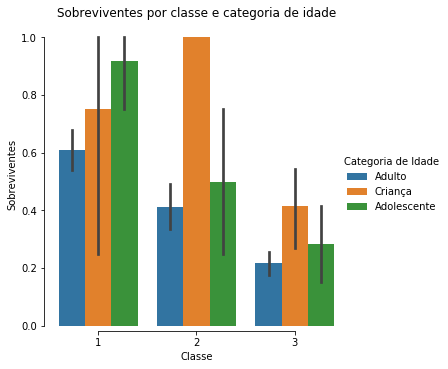

In [27]:
# Gráfico de Sobreviventes por classe e categoria de idade.
# Existe um warning nesse gráfico, mas não entendi como resolver.
g1 = sns.catplot(data=df_titanic, x='passenger_class', y='survived',
    kind='bar', hue='age_category')
g1._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por classe e categoria de idade')
sns.despine(offset=5, trim=True)
g1.savefig('imgs/g1-survived-class-by-age-cotegory.png')


A *Figura 1* ajuda a esclarecer visualmente a porcentagem de sobreviventes entre cada categoria e sua classe de passageiro. Por ela pode-se verificar claramente que a grande maioria dos sobreviventes são da primeira classe, sendo que na segunda classe quase todas as crianças sobreviveram.

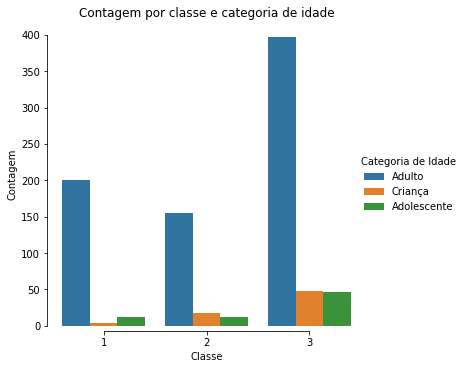

In [29]:
# Gráfico de contagem de passageiros por classe e categoria de idade.
g2 = sns.catplot(data=df_titanic, x='passenger_class',
    kind='count', hue='age_category')
g2._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem por classe e categoria de idade')
sns.despine(offset=5, trim=True)
g2.savefig('imgs/g2-count-class-by-age-cotegory.png')

Na *Figura 2* observa-se que a população de passageiros era constituída, na maior parte, por adultos. Para todas as categorias de idade, observa-se maior discrepância de valores na terceira classe em relação as demais. Observa-se ainda que a população de crianças na primeira classe foi a menor entre as classes.

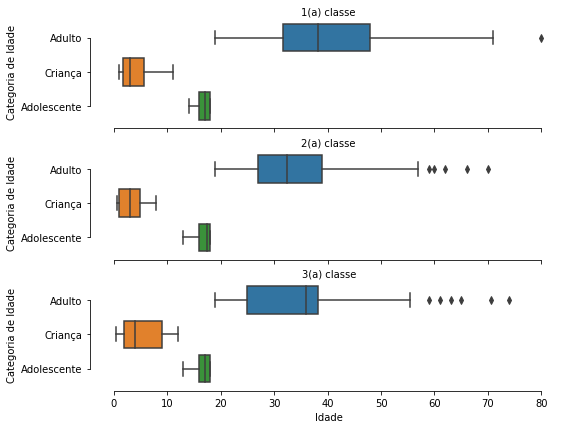

In [30]:
# Gráfico de caixa de categoria de idade por classe.
g3 = sns.catplot(y="age_category", x="age", row="passenger_class",
                 orient="h", height=2, aspect=4, kind="box",
                 data=df_titanic.query('age_category != "Desconhecido"'))
g3.set_ylabels('Categoria de Idade')
g3.set_xlabels('Idade')
g3.set_titles("{row_name}(a) classe")
sns.despine(offset=5, trim=True)
g3.savefig('imgs/g3-box-class-by-age-cotegory.png')

O mesmo é observado na *Figura 3*, com informações adicionais de que existem outliers na categoria adultos em todas as classes (*Figura 4*). Observa-se também que existe pouca variabilidade dentro das categorias, exceto para criança na primeira e terceira classe, adolescente na segunda classe e adultos na terceira classe.

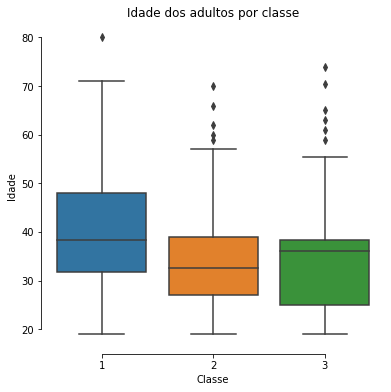

In [31]:
# Gráfico de caixa entre idade de passageiros adultos e classe social.
f, g8 = plt.subplots(figsize=(6, 6))
sns.boxplot(x="passenger_class", y="age",
            data=df_titanic.query('age_category != "Desconhecido" & age > 18'))
plt.ylabel('Idade')
plt.xlabel('Classe')
plt.title("Idade dos adultos por classe")
sns.despine(offset=5, trim=True);
g8.figure.savefig('imgs/g8-box-adult-age-by-social.png')

A *Figura 4* demonstra um gráfico de caixa com dados dos passageiros adultos em diferentes classes. É possível ver que existem outliers em todas as categorias.

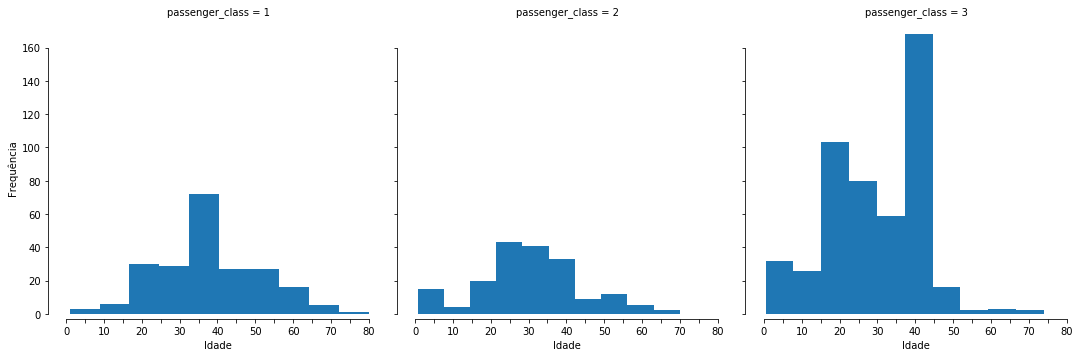

In [77]:
# Histograma idade por classe social

g = sns.FacetGrid(df_titanic_edited, col="passenger_class", height=5)
g.set_ylabels('Frequência')
g.map(plt.hist, "age")
g.set_ylabels('Frequência')
g.set_xlabels('Idade')
g.set(xticks=np.arange(0, 85, 5),
      xticklabels=['0', '', '10', '', '20', '', '30', '', 
                   '40', '', '50', '', '60', '', '70', '', '80'])
sns.despine(offset=5, trim=True);
g.savefig('imgs/g11-hist-age-first-to-third-class.png')

O primeiro gráfico de frequência na *Figura 5* representando a primeira classe apresenta uma distribuição simétrica e a maior frequência observada é de adultos com idade variando de 35 a 40 anos. No segundo e terceiro gráficos de frequência da *Figura 5* observam-se assimetrias positivas, sendo que no terceiro gráfico a maior frequência de idade varia de 40 a 45 anos e pertence a categoria adulta.

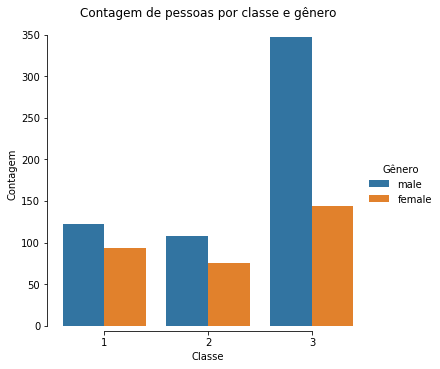

In [79]:
# Gráfico de contagem de passageiros por classe e gênero.
g4 = sns.catplot(data=df_titanic, x='passenger_class', kind='count', hue='sex')
g4._legend.set_title('Gênero')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por classe e gênero')
sns.despine(offset=5, trim=True)
g4.savefig('imgs/g4-count-passengers-class.png')

A *Figura 6* demonstra que a contagem de homens a bordo em todas as classes é maior que de de mulheres idependente da idade. Ainda há discrepância de passageiros do gênero masculino na terceira classe

In [94]:
# Tabela 2: Passageiros por classe, total de indivíduos por sexo e
# sobrevivementes da categoria.
df_2 = df_titanic.groupby(['passenger_class', 'sex']).agg(
    {'name':'count', 'survived':'sum'}).rename(
    columns={'name':'total'})
df_2.to_csv('tables/t_2.csv')
print('Tabela 2: Passageiros por classe com total de indivíduos por classe e sobreviventes.')
df_2

Tabela 2: Passageiros por classe com total de indivíduos por classe e sobreviventes.


total  survived
passenger_class sex                    
1               female     94        91
                male      122        45
2               female     76        70
                male      108        17
3               female    144        72
                male      347        47

A *Tabela 2* mostra que existe mais homens e mulheres na terceira classe, como observado anteriormente nas *Figuras 6*. A maioria dos sobreviventes são do gênero feminino, *Tabela 4*, sendo que a primeira e segunda classe quase todas as passageiras sobreviveram. Esses dados podem ser reafirmados pela *Figura 6*, que mostra a contagem de passageiros a bordo, com uma discrepância de passageiros do gênero masculino na terceira classe.

In [93]:
# Tabela 3: Contagem de passageiros por classe e sobreviventes.
df_3 = df_titanic.groupby('passenger_class').agg(
    {'name':'count', 'survived': 'sum'}).rename(
    columns={'name':'total'})
df_3.to_csv('tables/t_3.csv')
print('Tabela 3: Total de passageiros por classe e sobreviventes.')
df_3

Tabela 3: Total de passageiros por classe e sobreviventes.


,total,survived
passenger_class,,
1,216,136
2,184,87
3,491,119


A *Tabela 3* demonstra que a grande maioria, com o dobro de passageiros da primeira classe pertencia a terceira classe, porém aproximadamente 1/4 sobreviveu, enquanto a primeira classe teve uma sobrevivência maior que 50%.

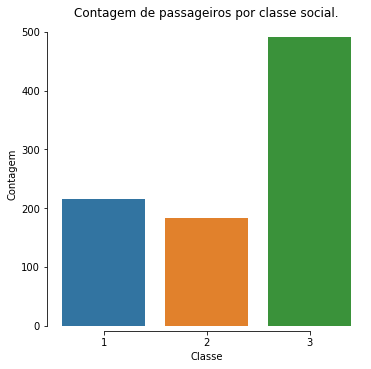

In [81]:
# Contagem de passageiros por classe.
g5 = sns.catplot(data=df_titanic, x='passenger_class', kind='count')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de passageiros por classe social.')
sns.despine(offset=5, trim=True)
g5.savefig('imgs/g5-count-passenger-class.png')

A *Figura 9* mostra o número de passageiros por classe. A classe com maior número de passageiros é a terceira classe, a segunda classe foi a com menor número de passageiros.

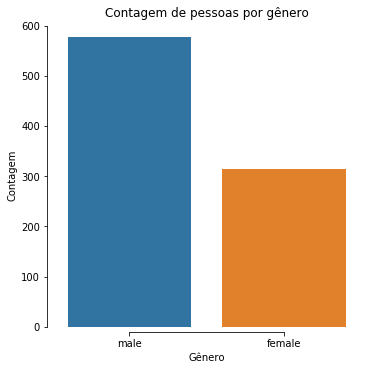

In [83]:
# Contagem de pessoas por gênero.
g6 = sns.catplot(data=df_titanic, x='sex', kind='count')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por gênero')
sns.despine(offset=5, trim=True)
g6.savefig('imgs/g6-count-people-by-gender.png')

A *Figura 10* mostra que quase tinha-se o dobre de pessoas a bordo do gênero masculino em comparação ao gênero feminino. 

In [92]:
# Tabela 4: Total de indivíduos por gênero e sobreviventes.
df_4 = df_titanic.groupby('sex').agg(
    {'name':'count', 'survived':'sum'}).rename(columns={'name':'total'})
df_4.to_csv('tables/t_4.csv')
print('Tabela 4: Total de indivíduos por gênero e sobreviventes.')
df_4

Tabela 4: Total de indivíduos por gênero e sobreviventes.


,total,survived
sex,,
female,314,233
male,577,109


A *Tabela 4* demonstra que os passageiros eram majoritariamente do gênero masculino, como também é observado na *Figura 10*, com maior sobrevivência de pessoas do gênero feminino. O que indica que mulheres tiveram uma maior taxa de sobrevivência comparado a homens, o que é esperado em um acidente dessas proporções.

In [91]:
# Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.
df_5 = df_titanic.groupby('age_category').agg(
    {'name':'count', 'survived':'sum'}).rename(columns={'name':'total'})
df_5.to_csv('tables/t_5.csv')
print('Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.')
df_5

Tabela 5: Contagem de pessoas por categoria de idade e sobreviventes.


,total,survived
age_category,,
Adolescente,70,30
Adulto,752,272
Criança,69,40


A *Tabela 5* mostra que a grande maioria dos passageiros eram adultos, com uma contagem quase igual de adolescentes e crianças.

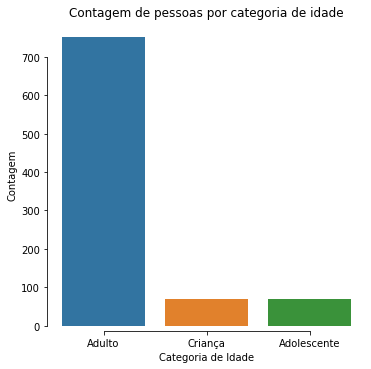

In [85]:
# Contagem de pessoas por categoria de idade.
g7 = sns.catplot(data=df_titanic, x='age_category', kind='count')
plt.xlabel('Categoria de Idade')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por categoria de idade')
sns.despine(offset=5, trim=True)
g7.savefig('imgs/g7-count-pearson-by-age-category.png')

A grande maioria dos passageiros era da categoria adulta, com a minoria sendo de crianças e adolescentes (*Figura 11*). Os adultos tiveram a maior taxa de morte devido seu maior número, porém mais de 50% dos adolescentes faleceram no naufrágio, no total 57,97% das crianças, 37,52% dos adultos e 42,86% dos adolescentes sobreviveram como pode ser observado na *Tabela 5*. Assim a maior taxa de sobrevivência não é de adultos e sim de crianças, com quase 58% de sobrevivência.

In [89]:
# Tabela 6: Descritiva da categoria de idade dos passageiros.
df_7 = df_titanic.groupby('age_category')['age'].describe().dropna()
df_7.to_csv('tables/t_7.csv')
print('Tabela 6: Descritiva da categoria de idade dos passageiros.')
df_7

Tabela 6: Descritiva da categoria de idade dos passageiros.


,count,mean,std,min,25%,50%,75%,max
age_category,,,,,,,,
Adolescente,70.0000,16.5786,1.4387,13.0000,16.0000,17.0000,18.0000,18.0000
Adulto,752.0000,35.2165,10.6138,19.0000,27.0000,36.0000,38.2334,80.0000
Criança,69.0000,4.7706,3.3904,0.4200,2.0000,4.0000,8.0000,12.0000


A *Tabela 6* mostra a descritiva das categorias de idade, No geral, a idade média dos adolescentes é de, aproximadamente, 17 anos (desvio de 1.44), mínimo de 13 anos e máximo de 18 anos; os adultos possuem, aproximadamente, 35 anos (desvio de 10.61), com mínimo de 19 anos e máximo de 80 anos; e as crianças possuem a idade média de, aproximadamente, 5 anos (desvio de 3.39), com mínimo de 0.42 meses e máximo de 12 anos.

In [90]:
# Tabela 7: Descritiva da categoria de idade dos passageiros por classe.
df_8 = df_titanic.groupby(
    ['age_category', 'passenger_class'])['age'].describe().dropna()
df_8.to_csv('tables/t_8.csv')
print('Tabela 7: Descritiva da categoria de idade dos passageiros por classe.')
df_8

Tabela 7: Descritiva da categoria de idade dos passageiros por classe.


count    mean     std     min     25%     50%  \
age_category passenger_class                                                    
Adolescente  1                12.0000 16.6667  1.3027 14.0000 16.0000 17.0000   
             2                12.0000 16.7500  1.7123 13.0000 16.0000 17.5000   
             3                46.0000 16.5109  1.4240 13.0000 16.0000 17.0000   
Adulto       1               200.0000 40.2025 12.1844 19.0000 31.7500 38.2334   
             2               155.0000 34.3811 10.5997 19.0000 27.0000 32.5000   
             3               397.0000 33.0309  8.8163 19.0000 25.0000 36.0000   
Criança      1                 4.0000  4.4800  4.5301  0.9200  1.7300  3.0000   
             2                17.0000  3.4900  2.5220  0.6700  1.0000  3.0000   
             3                48.0000  5.2483  3.5103  0.4200  2.0000  4.0000   

                                 75%     max  
age_category passenger_class                  
Adolescente  1               18.0000 18.0000  
             2               18.0000 18.0000  
             3               18.0000 18.0000  
Adulto       1               48.0000 80.0000  
             2               39.0000 70.0000  
             3               38.2334 74.0000  
Criança      1                5.7500 11.0000  
             2                5.0000  8.0000  
             3                9.0000 12.0000

A *Tabela 7* separa a descritiva das categorias de idade entre as classes de passageiro, por ela é possível verificar que adultos da primeira classe são os mais velhos, com idade media de 40 anos, já adolescentes tem pouca variação na média de idade por classe, assim como na categoria infantil.

In [95]:
# Tabela 8: Média de valor da passagem por local de embarque e sua classe.
df_9 = df_titanic.groupby(['passenger_class', 'embarked']).agg(
    {'fare':'mean', 'name':'count'}).rename(
    columns={'fare':'fare_mean','name':'total'})
df_9.to_csv('tables/t_9.csv')
print('Tabela 8: Média de valor da passagem por local de embarque e sua classe:')
df_9

Tabela 8: Média de valor da passagem por local de embarque e sua classe:


fare_mean  total
passenger_class embarked                  
1               C          104.7185     85
                Q           90.0000      2
                S           70.3649    127
2               C           25.3583     17
                Q           12.3500      3
                S           20.3274    164
3               C           11.2141     66
                Q           11.1834     72
                S           14.6441    353

Na *Tabela 8* podemos ver uma separação dos valores médios das passagens em cada posto de embarque do Titanic. Sendo C (Cherbourg), Q (Queenstown) e S (Southampton). As passagens mais caras da primeira classe foram compradas em Cherbourg (*Figura 13*), totalizando 168 passageiros sendo a maioria da primeira classe (Figura 12), sendo que em Southampton apresentou um maior movimento de passageiros. Houve pouquíssimos embarques da primeira e segunda classe em Queenstown, cinco passageiros apenas.

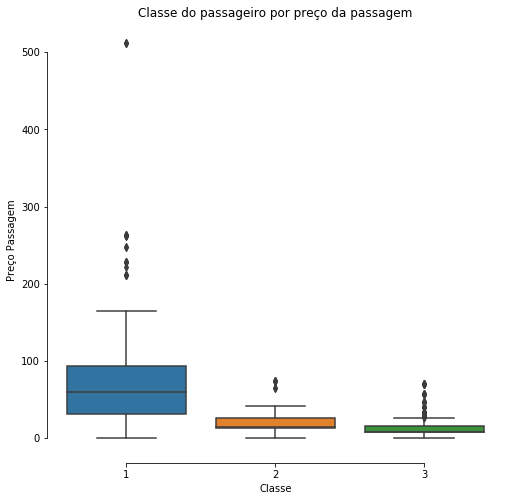

In [98]:
# Gráfico de caixa entre classe de passageiros e taxa da passagem.
f, g9 = plt.subplots(figsize=(8, 8))
sns.boxplot(x="passenger_class", y="fare", data=df_titanic)
plt.ylabel('Preço Passagem')
plt.xlabel('Classe')
plt.title("Classe do passageiro por preço da passagem")
sns.despine(offset=5, trim=True)
g9.figure.savefig('imgs/g9-box-class-by-ticket-fare.png')

Pela *Figura 12* pode-se observar que existem outliers com relação ao valor da passagem, como existem passagens com valores altos que permitiam entrada de mais de um passageiro. Como o banco de dados possuía dados faltantes, suspeita-se que esses outliers sejam passagens que abrangem mais passageiros que não estavam contidos no dataset.

/home/trprado/.local/share/virtualenvs/udacity-WaEjM5--/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


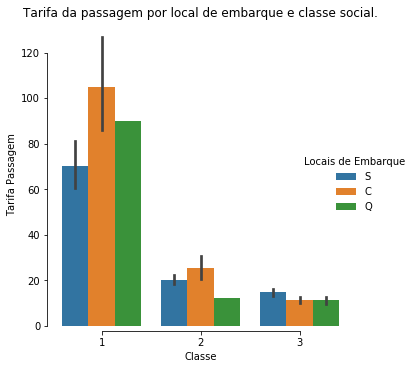

In [97]:
# Gráfico de barra com local de embarque e classe do passageiro.
g10 = sns.catplot(data=df_titanic, x='passenger_class',
    y='fare', kind='bar', hue='embarked')
g10._legend.set_title('Locais de Embarque')
plt.xlabel('Classe')
plt.ylabel('Tarifa Passagem')
plt.title('Tarifa da passagem por local de embarque e classe social.')
sns.despine(offset=5, trim=True)
g10.savefig('imgs/g10-bar-embarked-by-class.png')

A *Figura 13* contem a visualização da média das tarifas por classe, sendo C (Cherbourg), Q (Queenstown) e S (Southampton). Por ela podemos ver que as passagens em Cherbourg eram as que custavam mais caras tanto para a primeira quanto para a segunda classe. Em Queenstown o valor da passagem entre a terceira classe não tinha grande diferença de preço.

In [105]:
# Passagens com maior número de passageiros da primeira classe.
df_titanic['freq'] = df_titanic.groupby('ticket')['ticket'].transform('count')
# print('Passagens com maior número de passageiros da primeira classe:')
df_titanic_most_pc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 1').head(10)
df_titanic_most_pc.to_csv('tables/t_10.csv', index=False)
print('Tabela 9 - Passagens com maior número de passageiros da primeira classe.')
df_titanic_most_pc

Tabela 9 - Passagens com maior número de passageiros da primeira classe.


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,age_category,freq
380,1,1,"Bidois, Miss. Rosalie",female,42.0000,0,0,PC 17757,227.5250,C,Adulto,4
557,0,1,"Robbins, Mr. Victor",male,38.2334,0,0,PC 17757,227.5250,C,Adulto,4
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C,Adolescente,4
716,1,1,"Endres, Miss. Caroline Louise",female,38.0000,0,0,PC 17757,227.5250,C,Adulto,4
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0000,3,2,19950,263.0000,S,Adulto,4
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0000,3,2,19950,263.0000,S,Adulto,4
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0000,3,2,19950,263.0000,S,Adulto,4
438,0,1,"Fortune, Mr. Mark",male,64.0000,1,4,19950,263.0000,S,Adulto,4
306,1,1,"Fleming, Miss. Margaret",female,38.2334,0,0,17421,110.8833,C,Adulto,4
550,1,1,"Thayer, Mr. John Borland Jr",male,17.0000,0,2,17421,110.8833,C,Adolescente,4


In [106]:
# Passagens com maior número de passageiros da segunda classe.
df_titanic['freq'] = df_titanic.groupby('ticket')['ticket'].transform('count')
print('Tabela 10 - Passagens com maior número de passageiros da segunda classe:')
df_titanic_most_sc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 2').head(10)
df_titanic_most_sc.to_csv('tables/t_11.csv', index=False)
df_titanic_most_sc

Tabela 10 - Passagens com maior número de passageiros da segunda classe:


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,age_category,freq
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0000,0,0,S.O.C. 14879,73.5000,S,Adulto,5
120,0,2,"Hickman, Mr. Stanley George",male,21.0000,2,0,S.O.C. 14879,73.5000,S,Adulto,5
385,0,2,"Davies, Mr. Charles Henry",male,18.0000,0,0,S.O.C. 14879,73.5000,S,Adolescente,5
655,0,2,"Hickman, Mr. Leonard Mark",male,24.0000,2,0,S.O.C. 14879,73.5000,S,Adulto,5
665,0,2,"Hickman, Mr. Lewis",male,32.0000,2,0,S.O.C. 14879,73.5000,S,Adulto,5
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0000,1,2,SC/Paris 2123,41.5792,C,Criança,3
608,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0000,1,2,SC/Paris 2123,41.5792,C,Adulto,3
685,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0000,1,2,SC/Paris 2123,41.5792,C,Adulto,3
314,0,2,"Hart, Mr. Benjamin",male,43.0000,1,1,F.C.C. 13529,26.2500,S,Adulto,3
440,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0000,1,1,F.C.C. 13529,26.2500,S,Adulto,3


In [107]:
# Passagens com maior número de passageiros da terceira classe.
df_titanic['freq'] = df_titanic.groupby('ticket')['ticket'].transform('count')
print('Tabela 11 - Passagens com maior número de passageiros da terceira classe:')
df_titanic_most_tc = df_titanic.sort_values(by=['freq', 'ticket'], ascending=False).query(
    'passenger_class == 3').head(10)
df_titanic_most_tc.to_csv('tables/t_12.csv', index=False)
df_titanic_most_tc

Tabela 11 - Passagens com maior número de passageiros da terceira classe:


,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,embarked,age_category,freq
159,0,3,"Sage, Master. Thomas Henry",male,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
180,0,3,"Sage, Miss. Constance Gladys",female,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
201,0,3,"Sage, Mr. Frederick",male,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
324,0,3,"Sage, Mr. George John Jr",male,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
792,0,3,"Sage, Miss. Stella Anna",female,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
846,0,3,"Sage, Mr. Douglas Bullen",male,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,38.2334,8,2,CA. 2343,69.5500,S,Adulto,7
13,0,3,"Andersson, Mr. Anders Johan",male,39.0000,1,5,347082,31.2750,S,Adulto,7
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0000,4,2,347082,31.2750,S,Criança,7
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0000,4,2,347082,31.2750,S,Criança,7


Nas *Tabelas 9 a 11* mostram as passagens com maior número de passageiros por classe. A primeira classe a passagem com o maior número de pessoas tem 4, a grande maioria sobreviveu ao naufrágio. A terceira classe, possuíam mais de uma passagem com 7 passageiros sendo que todos faleceram, porém em pesquisas online pelo nome de família consta que o banco de dados não contem todo o registro da família Sage, sendo que o total eram de 11 passageiros na mesma passagem.

# 1.5. Conclusões e Resultados

## 1.5. Links uteis

- [Change Figure Size](https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot/31597278)
- [Save Figure in Seaborn](https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror)
- [Ploting with Seaborn](https://www.kaggle.com/princeashburton/plotting-with-seaborn)
- [Histograms and Density Plots in Python](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
- [Adjust Ticks in Seaborn](https://github.com/mwaskom/seaborn/issues/568)
- [CSV to Markdown](https://donatstudios.com/CsvToMarkdownTable)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Matplotlib Docs](https://matplotlib.org/contents.html)
- [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/)
- [Numpy Docs](https://docs.scipy.org/doc/numpy/)
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)